<a href="https://colab.research.google.com/github/mcnica89/DATA6100_F23/blob/main/Regression/MultipleRegressions_ScrapWork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf # R-style formula api

In [2]:
#Secret data generation!!
def secret_data(N):
  secret_class = np.concatenate([np.ones(N//2),2*np.ones(N//2)])
  X_1 = 10*np.random.rand(N)
  secret_class = (X_1 + np.random.randn(N) > 5)
  X_2 = secret_class + 0.1*np.random.randn(N)
  Y = 10*secret_class - X_1 + np.random.randn(N)
  return X_1,X_2,Y

N = 100
X_1,X_2,Y = secret_data(N)

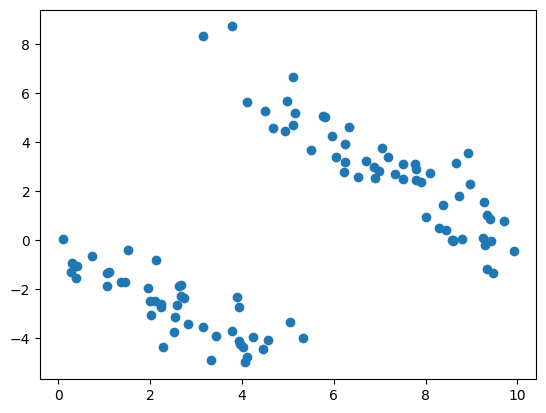

In [3]:
plt.plot(X_1,Y,'o')

#Multiple Linear Regression

In [4]:
df = pd.DataFrame({'X_1':X_1,'X_2':X_2,'Y':Y})
df

,X_1,X_2,Y
0,6.251103,1.058122,3.934355
1,8.449148,0.731199,0.414315
2,2.552476,0.114068,-3.123392
3,2.240809,-0.208621,-2.594515
4,9.335714,0.851743,-1.172211
...,...,...,...
95,8.961806,0.977990,2.299557
96,2.597576,0.052108,-2.651725
97,9.298108,0.979730,-0.181217
98,5.817123,0.971071,5.019179


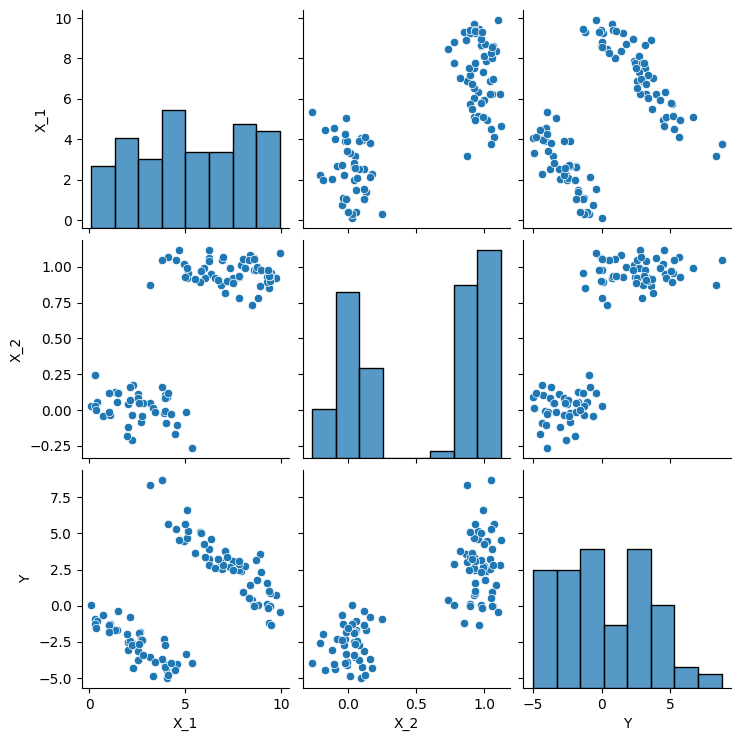

In [5]:
sns.pairplot(df, vars=['X_1', 'X_2', 'Y']);

# Y vs X_1

In [6]:
# ols model with intercept
Y_and_X_1_model = smf.ols(formula='Y ~ X_1', data=df)

# fitted model and summary
Y_and_X_1_fit = Y_and_X_1_model.fit()
print(Y_and_X_1_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     19.54
Date:                Thu, 21 Sep 2023   Prob (F-statistic):           2.54e-05
Time:                        00:41:56   Log-Likelihood:                -251.49
No. Observations:                 100   AIC:                             507.0
Df Residuals:                      98   BIC:                             512.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.1206      0.636     -3.335      0.0

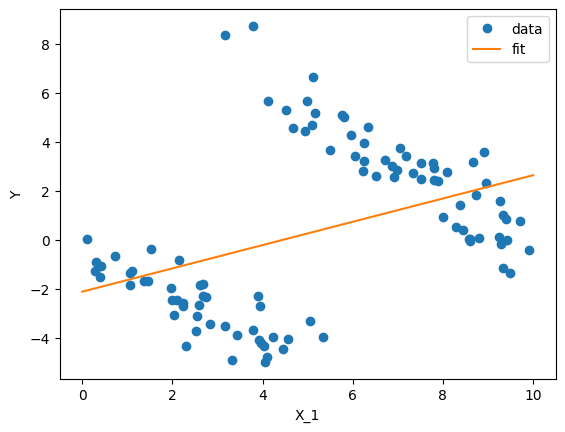

In [7]:
X1_axis = np.linspace(0,10,100)
Y_pred = Y_and_X_1_fit.predict(pd.DataFrame({'X_1':X1_axis}))
plt.plot(X_1,Y,'o',label='data')
plt.plot(X1_axis,Y_pred,'-',label='fit')
plt.xlabel("X_1")
plt.ylabel("Y")
plt.legend()

# Y vs X_2

In [8]:
# ols model with intercept
Y_and_X_2_model = smf.ols(formula='Y ~ X_2', data=df)

# fitted model and summary
Y_and_X_2_fit = Y_and_X_2_model.fit()
print(Y_and_X_2_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     201.8
Date:                Thu, 21 Sep 2023   Prob (F-statistic):           1.55e-25
Time:                        00:41:57   Log-Likelihood:                -204.66
No. Observations:                 100   AIC:                             413.3
Df Residuals:                      98   BIC:                             418.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.7197      0.287     -9.465      0.0

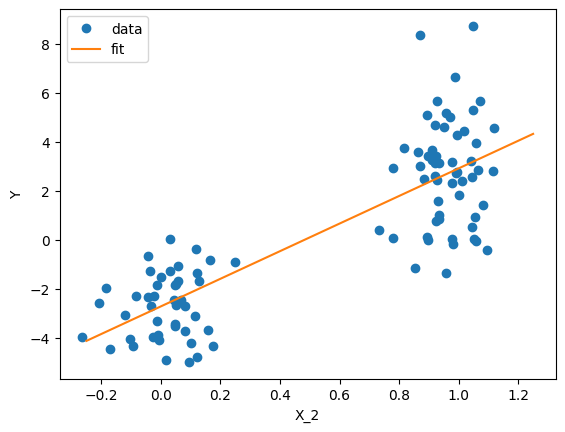

In [9]:
X2_axis = np.linspace(-0.25,1.25,100)
Y_pred = Y_and_X_2_fit.predict(pd.DataFrame({'X_2':X2_axis}))
plt.plot(X_2,Y,'o',label='data')
plt.plot(X2_axis,Y_pred,'-',label='fit')
plt.xlabel("X_2")
plt.ylabel("Y")
plt.legend()

# Y vs X_1 and X_2

In [10]:
# ols model with intercept
Y_and_all_X_model = smf.ols(formula='Y ~ X_1 + X_2', data=df)

# fitted model and summary
Y_and_all_X_results = Y_and_all_X_model.fit()
print(Y_and_all_X_results.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     224.4
Date:                Thu, 21 Sep 2023   Prob (F-statistic):           4.08e-37
Time:                        00:41:58   Log-Likelihood:                -174.20
No. Observations:                 100   AIC:                             354.4
Df Residuals:                      97   BIC:                             362.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7675      0.304     -2.528      0.0

       X_1       X_2
0      0.0 -0.250000
1      0.0 -0.234848
2      0.0 -0.219697
3      0.0 -0.204545
4      0.0 -0.189394
...    ...       ...
9995  10.0  1.189394
9996  10.0  1.204545
9997  10.0  1.219697
9998  10.0  1.234848
9999  10.0  1.250000

[10000 rows x 2 columns]
0      -3.020776
1      -2.884213
2      -2.747650
3      -2.611087
4      -2.474524
          ...   
9995    2.653407
9996    2.789970
9997    2.926533
9998    3.063096
9999    3.199659
Length: 10000, dtype: float64


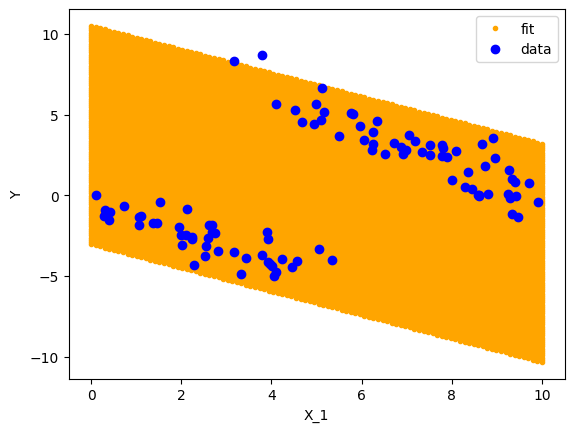

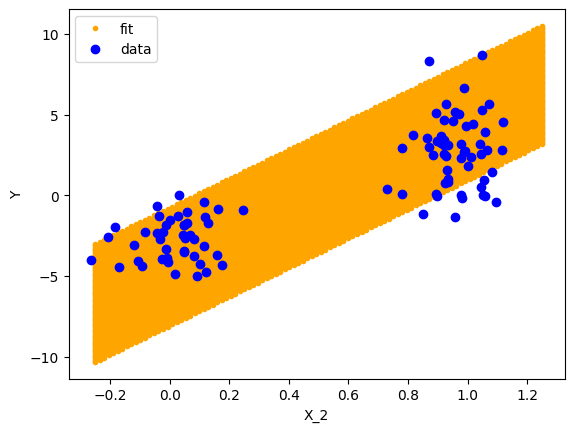

In [12]:
X1_axis = np.linspace(0,10,100)
df_X1_axis = pd.DataFrame({'X_1':X1_axis})
X2_axis = np.linspace(-0.25,1.25,100)
df_X2_axis = pd.DataFrame({'X_2':X2_axis})
df_both = df_X1_axis.merge(df_X2_axis, how='cross')
print(df_both)

Y_pred = Y_and_all_X_results.predict(df_both)
print(Y_pred)

for X_data,X_label in [ (X_1,'X_1'), (X_2,'X_2')  ]:
  plt.plot(df_both[X_label],Y_pred,'.',c='orange',label='fit')
  plt.plot(X_data,Y,'o',c='b',label='data')
  plt.xlabel(X_label)
  plt.ylabel("Y")
  plt.legend()
  plt.show()

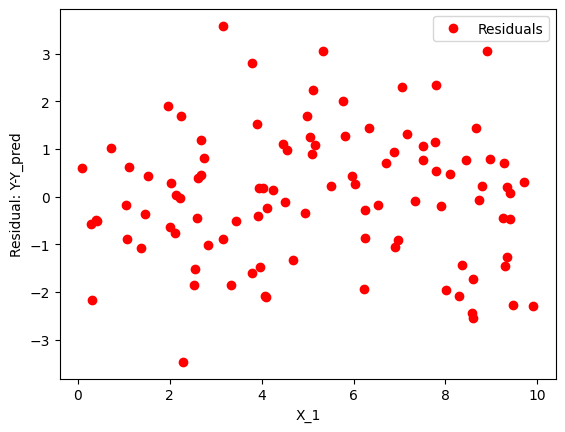

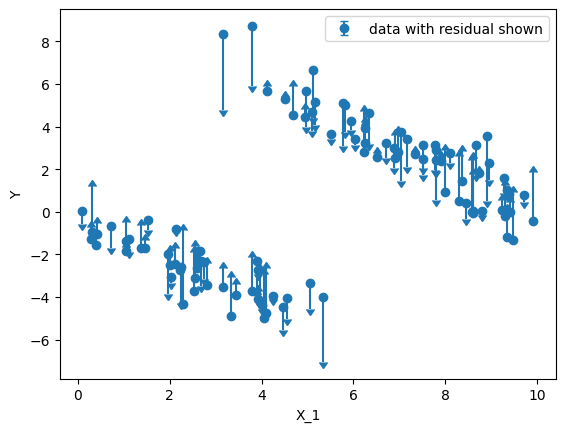

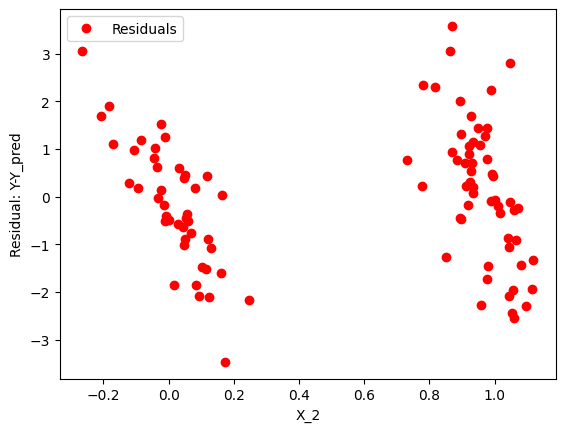

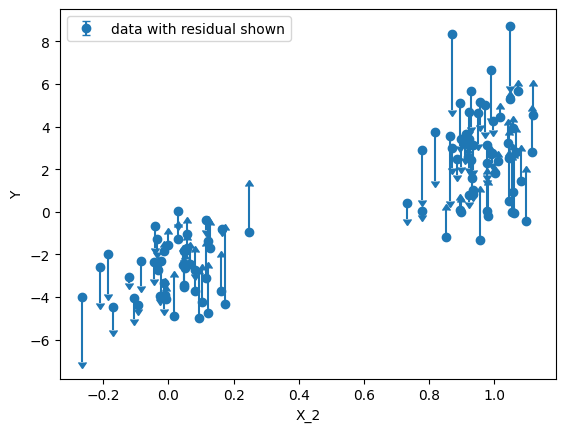

In [13]:
Y_pred = Y_and_all_X_results.predict(df)
Residuals = Y-Y_pred
Overestimate = np.array(Residuals > 0)
Underestimate = np.array(Residuals < 0)
for X_data,X_label in [ (X_1,'X_1'), (X_2,'X_2')  ]:
  plt.plot(X_data,Residuals,'ro',label='Residuals')
  plt.xlabel(X_label)
  plt.ylabel("Residual: Y-Y_pred")
  plt.legend()
  plt.show()

  plt.errorbar(X_data,Y,fmt='o',yerr=np.abs(Residuals),lolims=Underestimate,uplims = Overestimate,label='data with residual shown')
  plt.xlabel(X_label)
  plt.ylabel("Y")
  plt.legend()
  plt.show()

# Adding a feature!

In [14]:
X_3 = (X_2 > 0.5)
df['X_3'] = X_3

# ols model with intercept
Y_and_all_X_model = smf.ols(formula='Y ~ X_1 + X_2 + X_3', data=df)

# fitted model and summary
Y_and_all_X_results = Y_and_all_X_model.fit()
print(Y_and_all_X_results.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     388.5
Date:                Thu, 21 Sep 2023   Prob (F-statistic):           1.54e-53
Time:                        00:43:06   Log-Likelihood:                -131.80
No. Observations:                 100   AIC:                             271.6
Df Residuals:                      96   BIC:                             282.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0344      0.212      0.163      

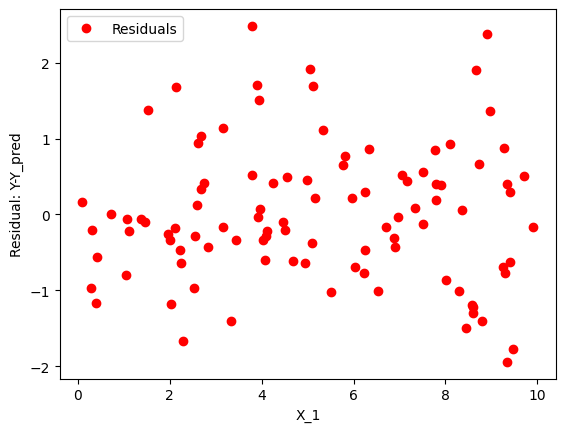

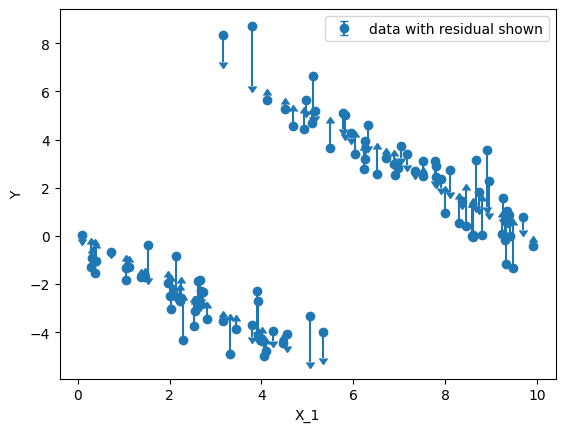

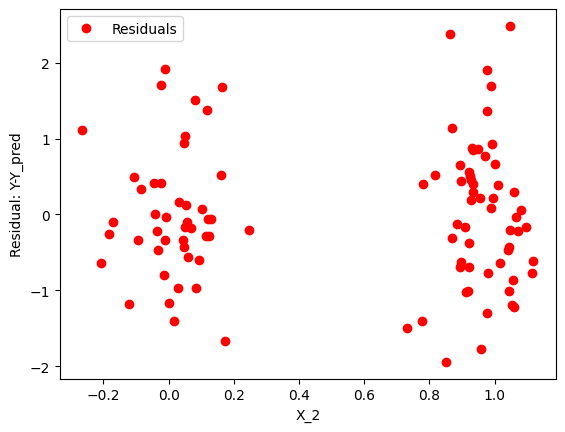

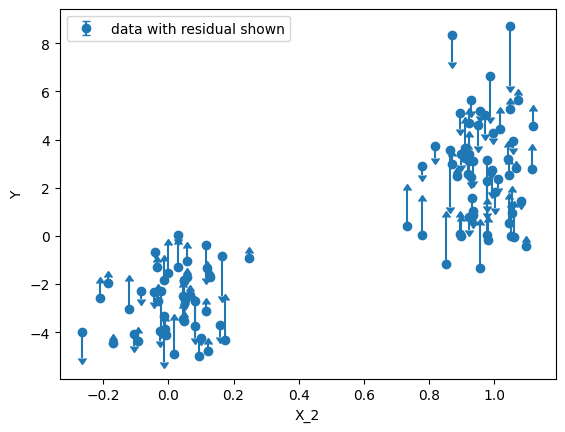

In [15]:
Y_pred = Y_and_all_X_results.predict(df)
Residuals = Y-Y_pred
Overestimate = np.array(Residuals > 0)
Underestimate = np.array(Residuals < 0)
for X_data,X_label in [ (X_1,'X_1'), (X_2,'X_2')  ]:
  plt.plot(X_data,Residuals,'ro',label='Residuals')
  plt.xlabel(X_label)
  plt.ylabel("Residual: Y-Y_pred")
  plt.legend()
  plt.show()

  plt.errorbar(X_data,Y,fmt='o',yerr=np.abs(Residuals),lolims=Underestimate,uplims = Overestimate,label='data with residual shown')
  plt.xlabel(X_label)
  plt.ylabel("Y")
  plt.legend()
  plt.show()